# Classification Models – California Housing Dataset

Tasks:
1. Create classification labels (Low / Medium / High)
2. Train Logistic Regression, Decision Tree, Random Forest
3. Select best model using validation set
4. Final evaluation using test set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

In [4]:
# Calculate thresholds ONLY from training data
low_thresh = y_train.quantile(0.33)
high_thresh = y_train.quantile(0.66)

def classify(value):
    if value <= low_thresh:
        return 0   # Low
    elif value <= high_thresh:
        return 1   # Medium
    else:
        return 2   # High

y_train_cls = y_train.apply(classify)
y_val_cls   = y_val.apply(classify)
y_test_cls  = y_test.apply(classify)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [6]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_cls)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
y_val_pred_log = log_model.predict(X_val_scaled)

print("Logistic Regression Accuracy:",
      accuracy_score(y_val_cls, y_val_pred_log))

Logistic Regression Accuracy: 0.7131782945736435


In [8]:
tree_model = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_model.fit(X_train_scaled, y_train_cls)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_val_pred_tree = tree_model.predict(X_val_scaled)

print("Decision Tree Accuracy:",
      accuracy_score(y_val_cls, y_val_pred_tree))

Decision Tree Accuracy: 0.7335271317829457


In [10]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train_cls)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_val_pred_rf = rf_model.predict(X_val_scaled)

print("Random Forest Accuracy:",
      accuracy_score(y_val_cls, y_val_pred_rf))

Random Forest Accuracy: 0.8010335917312662


The model with highest validation accuracy is selected for final testing.

In [12]:
# Use the best model (example: Random Forest)
y_test_pred = rf_model.predict(X_test_scaled)

In [13]:
print("Test Accuracy:", accuracy_score(y_test_cls, y_test_pred))
print("\nClassification Report:\n")
print(classification_report(y_test_cls, y_test_pred))

Test Accuracy: 0.8236434108527132

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1020
           1       0.75      0.75      0.75      1009
           2       0.87      0.85      0.86      1067

    accuracy                           0.82      3096
   macro avg       0.82      0.82      0.82      3096
weighted avg       0.82      0.82      0.82      3096



In [14]:
rf_val_acc = accuracy_score(y_val_cls, y_val_pred_rf)
rf_test_acc = accuracy_score(y_test_cls, y_test_pred)

print("Random Forest Validation Accuracy:", rf_val_acc)
print("Random Forest Test Accuracy:", rf_test_acc)

Random Forest Validation Accuracy: 0.8010335917312662
Random Forest Test Accuracy: 0.8236434108527132


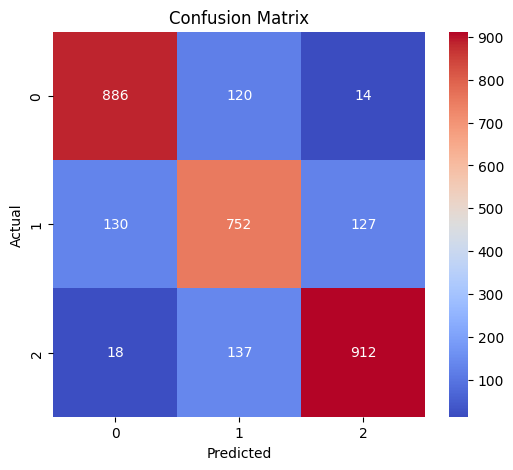

In [ ]:
cm = confusion_matrix(y_test_cls, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(rf_model, "../models/classifier_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']